In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Working with os module - os is a module in Python 3.
# Its main purpose is to interact with the operating system. 
# It provides functionalities to manipulate files and folders.

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data-testing-svm']


In [2]:
print('# File sizes')
for f in os.listdir('../input'):
    print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')

# File sizes
data-testing-svm              0.0MB


In [3]:
%%time

file = ('../input/data-testing-svm/Data_Testing-SVM.csv')
data = pd.read_csv(file, encoding='latin-1')

CPU times: user 6.24 ms, sys: 2.94 ms, total: 9.18 ms
Wall time: 18.5 ms


In [4]:
data.shape

(300, 10)

In [5]:
data.head()

,ï»¿Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri,Pelunasan Kredit
0,1234561308,4,2,3,4,3,1,4,4,0
1,1234561774,4,1,1,4,1,3,5,5,0
2,1234561894,1,4,1,2,3,1,3,4,0
3,1234561750,3,4,2,1,4,2,2,1,1
4,1234561342,2,4,1,1,4,1,2,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ï»¿Customer ID    300 non-null    int64
 1   Age               300 non-null    int64
 2   Income            300 non-null    int64
 3   Education         300 non-null    int64
 4   Occupation        300 non-null    int64
 5   Income.1          300 non-null    int64
 6   Average Balance   300 non-null    int64
 7   Appraisal         300 non-null    int64
 8   Industri          300 non-null    int64
 9   Pelunasan Kredit  300 non-null    int64
dtypes: int64(10)
memory usage: 23.6 KB


In [7]:
data[data == '?'] = np.nan

In [8]:
for col in ['Income', 'Occupation', 'Pelunasan Kredit']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [9]:
X = data.drop(['Pelunasan Kredit'], axis=1)

y = data['Pelunasan Kredit']

In [10]:
X.head()

,ï»¿Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri
0,1234561308,4,2,3,4,3,1,4,4
1,1234561774,4,1,1,4,1,3,5,5
2,1234561894,1,4,1,2,3,1,3,4
3,1234561750,3,4,2,1,4,2,2,1
4,1234561342,2,4,1,1,4,1,2,2


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn import preprocessing

categorical = ['Age', 'Income', 'Education', 'Occupation', 'Income.1', 'Average Balance', 'Appraisal', 'Industri']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [14]:
X_train.head()

,ï»¿Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri
0,0.316492,0.805583,0.782283,1.480281,1.275915,-1.427919,-1.431241,-0.821610,-0.706353
1,0.621989,1.554133,0.782283,1.480281,-0.839418,1.329442,1.417674,0.604325,-1.422943
2,0.302283,-1.440068,0.052152,-0.624859,0.570804,-1.427919,-1.431241,-0.108643,-0.706353
3,-0.909048,0.057032,0.782283,1.480281,-0.134307,1.329442,1.417674,0.604325,0.010237
4,-1.370846,-0.691518,0.052152,0.076854,-0.839418,-1.427919,-0.719012,1.317292,0.726827


In [15]:
#Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Regression accuracy score with all the features: 0.4889


In [16]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.15331718, 0.13109132, 0.12427544, 0.11474123, 0.11194499,
       0.1066477 , 0.09587576, 0.0884438 , 0.07366258])

In [17]:
X = data.drop(['Income','Industri'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1', 'Average Balance', 'Appraisal']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.2111


In [18]:
X = data.drop(['Income','Industri','Appraisal'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1', 'Average Balance']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.2111


In [19]:
X = data.drop(['Income','Industri','Appraisal', 'Average Balance'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 11 features: 0.1556


In [20]:
X = data.drop(['Income'], axis=1)
y = data['Income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Age', 'Education', 'Occupation', 'Income.1', 'Average Balance', 'Appraisal', 'Industri', 'Pelunasan Kredit']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 8


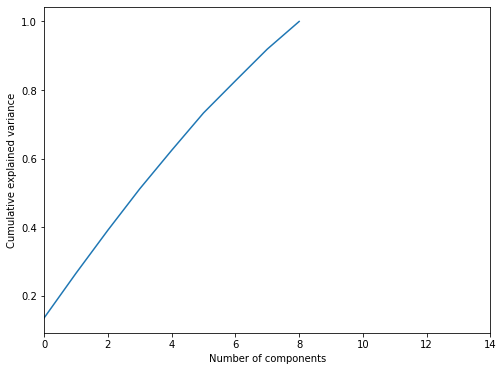

In [21]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()